## Setting data in colab and Path naming

In [1]:
# 구글 마운트
# Google mount
from google.colab import drive
drive.mount("/content/drive")

# 현재 디렉토리 /content로 이미지 데이터 복사 후 현재 디렉토리 ROOT_DIR로 명명
# Copy image data to /content and name /content as ROOT_DIR
import shutil
shutil.copy("/content/drive/MyDrive/Colab Notebooks/Blood Cell Images.zip", "/content")
ROOT_DIR = "/content"

# blood_cell_images 디렉토리 생성과 동시에 압축해제 후 blood_cell_images 디렉토리 DATA_ROOT_DIR로 명명
# Decompress data in blood_cell_images zip and name blood_cell_images dir as DATA_ROOT_DIR
import zipfile
with zipfile.ZipFile("/content/Blood Cell Images.zip", "r") as target_file:
  target_file.extractall("/content/blood_cell_images")
  DATA_ROOT_DIR = "/content/blood_cell_images"

# blood_cell_images 디렉토리에 TEST, TRAIN 그리고 TEST_SIMPLE 디렉토리 확인 후
# 각각 TEST_DATA_ROOT_DIR, TRIAN_DATA_ROOT_DIR로 명명
# Name TEST dir, TRAIN dir and TEST_SIMPLE dir in blood_cell_images dir as TEST_DATA_ROOT_DIR, TRAIN_DATA_ROOT_DIR, VAL_DATA_DIR
TRAIN_DATA_ROOT_DIR = "/content/blood_cell_images/TRAIN"
TEST_DATA_ROOT_DIR = "/content/blood_cell_images/TEST"
VAL_DATA_ROOT_DIR = "/content/blood_cell_images/TEST_SIMPLE"

Mounted at /content/drive


## Checking number of data

In [2]:
# 훈련 데이터 개수 파악
# number of Training data
import os
train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)
print(train_label_name_list)

for train_label_name in train_label_name_list:
  print(train_label_name, "=>", len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, train_label_name))))

# 테스트 데이터 개수 파악
# number of Testing data
print(train_label_name_list)

for test_label_name in train_label_name_list:
  print(test_label_name, "=>", len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, test_label_name))))

# 검증 데이터 개수 파악
# number of validation data

print(train_label_name_list)

for val_label_name in train_label_name_list:
  print(val_label_name, "=>", len(os.listdir(os.path.join(VAL_DATA_ROOT_DIR, val_label_name))))

['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']
NEUTROPHIL => 2499
MONOCYTE => 2478
EOSINOPHIL => 2497
LYMPHOCYTE => 2483
['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']
NEUTROPHIL => 624
MONOCYTE => 620
EOSINOPHIL => 623
LYMPHOCYTE => 620
['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']
NEUTROPHIL => 48
MONOCYTE => 4
EOSINOPHIL => 13
LYMPHOCYTE => 6


## Gathering all data in one dir

In [3]:
#TEST_SIMPLE 디렉토리에 있는 파일 TRAIN 디렉토리로 옮기기
#Move validation data to train data dir
for label_name in train_label_name_list:
  src = os.path.join(VAL_DATA_ROOT_DIR, label_name)
  dst = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
  files = os.listdir(src)

  for file in files:
    shutil.move(os.path.join(src, file), os.path.join(dst, file))
    print(file, "had been moved to training dir", label_name, "dir")

#TEST 디렉토리에 있는 파일 TRAIN 디렉토리로 옮기기
#Move testing data to train data dir
for label_name in train_label_name_list:
  src = os.path.join(TEST_DATA_ROOT_DIR, label_name)
  dst = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
  files = os.listdir(src)

  for file in files:
    shutil.move(os.path.join(src, file), os.path.join(dst, file))
    print(file, "had been moved to training dir", label_name, "dir")

_46_2162.jpeg had been moved to training dir NEUTROPHIL dir
_32_2063.jpeg had been moved to training dir NEUTROPHIL dir
_28_4752.jpeg had been moved to training dir NEUTROPHIL dir
_29_1866.jpeg had been moved to training dir NEUTROPHIL dir
_4_1395.jpeg had been moved to training dir NEUTROPHIL dir
_14_4489.jpeg had been moved to training dir NEUTROPHIL dir
_17_9949.jpeg had been moved to training dir NEUTROPHIL dir
_1_2118.jpeg had been moved to training dir NEUTROPHIL dir
_36_5118.jpeg had been moved to training dir NEUTROPHIL dir
_41_2530.jpeg had been moved to training dir NEUTROPHIL dir
_34_3330.jpeg had been moved to training dir NEUTROPHIL dir
_43_289.jpeg had been moved to training dir NEUTROPHIL dir
_33_390.jpeg had been moved to training dir NEUTROPHIL dir
_5_1480.jpeg had been moved to training dir NEUTROPHIL dir
_27_4190.jpeg had been moved to training dir NEUTROPHIL dir
_15_9520.jpeg had been moved to training dir NEUTROPHIL dir
_31_3491.jpeg had been moved to training dir 

In [4]:
# 훈련 데이터 개수 파악
# checking number of Training data
train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)
print(train_label_name_list)

for train_label_name in train_label_name_list:
  print(train_label_name, "=>", len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, train_label_name))))

['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']
NEUTROPHIL => 3171
MONOCYTE => 3095
EOSINOPHIL => 3133
LYMPHOCYTE => 3108


## Shuffle

In [5]:
import numpy as np

for label_name in train_label_name_list:
  files = os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))
  np.random.shuffle(files)

  move_num = int(len(files)*0.2)
  test_files = files[:move_num]
  # train_files = files[move_num:]

  for test_file in test_files:
    shutil.move(os.path.join(os.path.join(TRAIN_DATA_ROOT_DIR, label_name), test_file), os.path.join(os.path.join(TEST_DATA_ROOT_DIR, label_name), test_file))

  print(len(test_files), "files in train", label_name, "dir had been moved to testing dir", label_name)

634 files in train NEUTROPHIL dir had been moved to testing dir NEUTROPHIL
619 files in train MONOCYTE dir had been moved to testing dir MONOCYTE
626 files in train EOSINOPHIL dir had been moved to testing dir EOSINOPHIL
621 files in train LYMPHOCYTE dir had been moved to testing dir LYMPHOCYTE


In [6]:
# 훈련 데이터 개수 파악
# number of Training data
import os
train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)
print(train_label_name_list)

for train_label_name in train_label_name_list:
  print(train_label_name, "=>", len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, train_label_name))))

# 테스트 데이터 개수 파악
# number of Testing data
print(train_label_name_list)

for test_label_name in train_label_name_list:
  print(test_label_name, "=>", len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, test_label_name))))

['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']
NEUTROPHIL => 2537
MONOCYTE => 2476
EOSINOPHIL => 2507
LYMPHOCYTE => 2487
['NEUTROPHIL', 'MONOCYTE', 'EOSINOPHIL', 'LYMPHOCYTE']
NEUTROPHIL => 634
MONOCYTE => 619
EOSINOPHIL => 626
LYMPHOCYTE => 621


## Setting image size for train

In [7]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

## Importing data using ImageDataGenerator

In [8]:
# ImageDataGenerator에 정규화 기능 추가
# Add normalizing function in ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 이미지 색상, 크기, 레이블 타입 인코딩 설정
# setting image size, color mode and integer type encoding
train_generator = train_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR,
                                                    batch_size = 32,
                                                    color_mode="rgb",
                                                    class_mode="sparse",
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT))

test_generator = train_datagen.flow_from_directory(TEST_DATA_ROOT_DIR,
                                                   batch_size = 32,
                                                   color_mode="rgb",
                                                   class_mode="sparse",
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 10007 images belonging to 4 classes.
Found 2500 images belonging to 4 classes.


In [9]:
# 레이블과 레이블 개수 확인
# checking labels and the number of labels

print(train_generator.class_indices, train_generator.num_classes)
print(test_generator.class_indices, test_generator.num_classes)

{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3} 4
{'EOSINOPHIL': 0, 'LYMPHOCYTE': 1, 'MONOCYTE': 2, 'NEUTROPHIL': 3} 4


##Transfer Learning

In [10]:
# fine tunning을 위한 학습된 모델 구축(MobileNet)
# Establishing pre-trained model(MobileNet) for fine tunning
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNet, Xception

pre_trained_model = MobileNet(weights="imagenet", include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

17225924/17225924 [==============================] - 0s 0us/step


## Fine tunning

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

model = Sequential()

model.add(pre_trained_model)

model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(train_generator.num_classes, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0

In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=["accuracy"])

##  Model train
- earlystopping
  - val_loss
  - min
  - patience = 5
- modelcheckpoint
  - val_loss
  - save_best_only
- check elapsed time


In [13]:
from datetime import datetime
start_time = datetime.now()

from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
mcp = ModelCheckpoint("/content/blood_cell_image_classification_model.h5", monitor='val_loss', verbose=1, save_best_only=True)
result = model.fit(train_generator, epochs=30, validation_data=test_generator, callbacks=[es, mcp])

end_time = datetime.now()
print("걸린시간 :", end_time - start_time)

Epoch 1/30
313/313 [==============================] - ETA: 0s - loss: 1.5993 - accuracy: 0.3153
Epoch 1: val_loss improved from inf to 1.15721, saving model to /content/blood_cell_image_classification_model.h5
313/313 [==============================] - 77s 156ms/step - loss: 1.5993 - accuracy: 0.3153 - val_loss: 1.1572 - val_accuracy: 0.5292
Epoch 2/30
313/313 [==============================] - ETA: 0s - loss: 1.2453 - accuracy: 0.4514
Epoch 2: val_loss improved from 1.15721 to 0.88093, saving model to /content/blood_cell_image_classification_model.h5
313/313 [==============================] - 44s 140ms/step - loss: 1.2453 - accuracy: 0.4514 - val_loss: 0.8809 - val_accuracy: 0.7164
Epoch 3/30
313/313 [==============================] - ETA: 0s - loss: 0.9512 - accuracy: 0.6053
Epoch 3: val_loss improved from 0.88093 to 0.59147, saving model to /content/blood_cell_image_classification_model.h5
313/313 [==============================] - 44s 141ms/step - loss: 0.9512 - accuracy: 0.6053 - 

## Visualizaiton

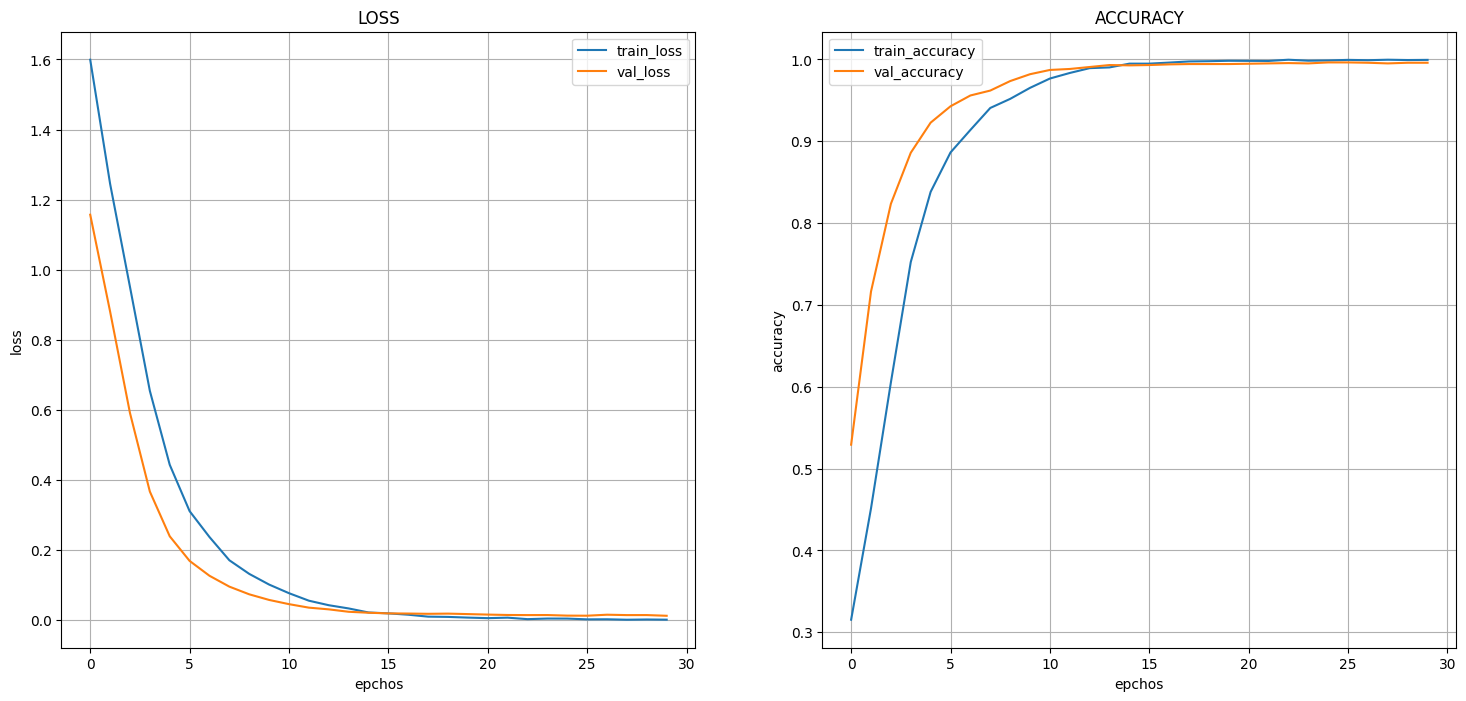

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.title("LOSS")
plt.xlabel("epchos")
plt.ylabel("loss")
plt.grid()
plt.plot(result.history["loss"], label="train_loss")
plt.plot(result.history["val_loss"], label="val_loss")
plt.legend(loc="best")

plt.subplot(1, 2, 2)
plt.title("ACCURACY")
plt.xlabel("epchos")
plt.ylabel("accuracy")
plt.grid()
plt.plot(result.history["accuracy"], label="train_accuracy")
plt.plot(result.history["val_accuracy"], label="val_accuracy")
plt.legend(loc="best")

In [27]:
model.evaluate(test_generator)

79/79 [==============================] - 6s 79ms/step - loss: 0.0131 - accuracy: 0.9960


[0.013100521638989449, 0.9959999918937683]

## Testing with any random Eosinophil image downloaded from goolge

In [15]:
pip install opencv-python

(-0.5, 223.5, 223.5, -0.5)

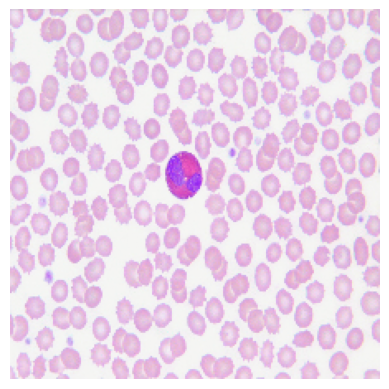

In [18]:
import cv2
test_img = cv2.imread("Eosinophils_predic_image.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB) # converting image from BGR to RGB
test_img = cv2.resize(test_img, (IMG_WIDTH, IMG_HEIGHT)) #resizing
test_img = test_img/255 #normalization

plt.imshow(test_img)
plt.axis("off")

In [30]:
predict_result = model.predict(test_img.reshape(-1, 224, 224, 3))
print(predict_result)

print("\n The predict answer is", list(train_generator.class_indices.keys())[int(np.argmax(predict_result))])

1/1 [==============================] - 0s 30ms/step
[[9.9469650e-01 2.0531272e-04 5.4618379e-04 4.5520440e-03]]

 The predict answer is EOSINOPHIL
